In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("C://Users//SUYDUBEY//Documents//Data Science//Refactored_Py_DS_ML_Bootcamp-master//10-Data-Capstone-Projects//911.csv")

In [3]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [6]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [7]:
df['title'].nunique()

110

In [8]:
def first(string):
    return string.split(':')[0]
    

In [9]:
df['reason'] = df['title'].apply(first)


In [10]:
df['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

C:\Users\SUYDUBEY\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='reason', ylabel='count'>

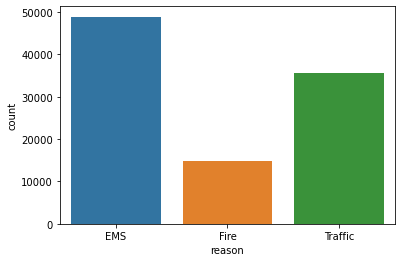

In [11]:
sns.countplot('reason',data=df)

In [12]:
type(df['timeStamp'].iloc[0])

str

In [13]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [14]:
time = df['timeStamp'].iloc[0]
time.hour

17

In [15]:
df['hour'] = df['timeStamp'].apply(lambda time:time.hour)
df['Month'] = df['timeStamp'].apply(lambda time:time.month)
df['Day of week'] = df['timeStamp'].apply(lambda time:time.dayofweek)


In [16]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [17]:
df['Day of week'] = df['Day of week'].map(dmap)

In [18]:
df['Day of week']

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: Day of week, Length: 99492, dtype: object

<AxesSubplot:xlabel='Day of week', ylabel='count'>

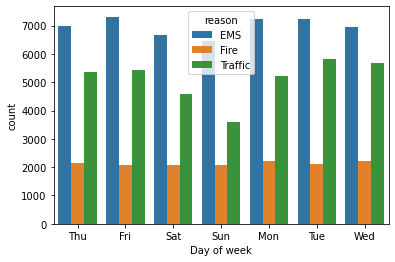

In [19]:
sns.countplot(x='Day of week',hue='reason',data=df)

<AxesSubplot:xlabel='Month', ylabel='count'>

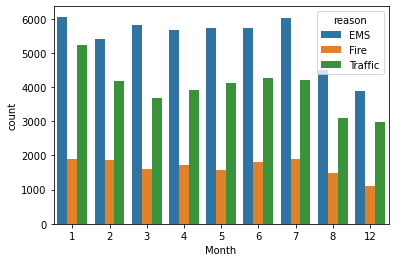

In [20]:
sns.countplot(x='Month',hue='reason',data=df)

In [21]:
bymonth = df.groupby('Month').count()
bymonth.head(12)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,Day of week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


<AxesSubplot:xlabel='Month'>

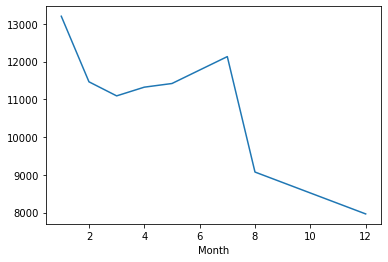

In [22]:
bymonth['twp'].plot()

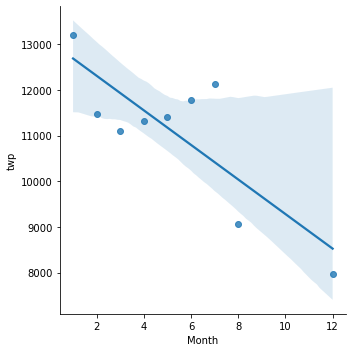

In [23]:
sns.lmplot(x='Month',y='twp',data=bymonth.reset_index())

In [25]:
df['Date'] = df['timeStamp'].apply(lambda t:t.date())

In [26]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,Month,Day of week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


<AxesSubplot:xlabel='Date'>

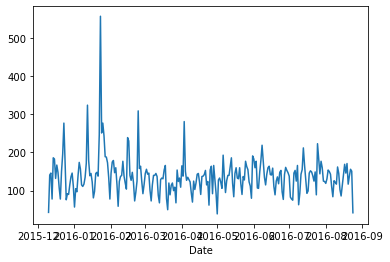

In [32]:
 df[df['reason']=='Traffic'].groupby('Date').count()['lat'].plot()

<AxesSubplot:xlabel='Date'>

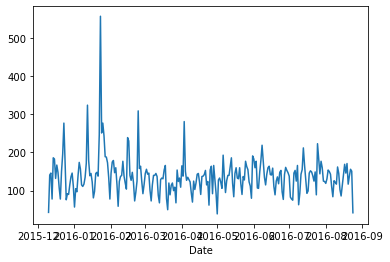

In [33]:
df[df['reason']=='Traffic'].groupby('Date').count()['lat'].plot()

<AxesSubplot:xlabel='Date'>

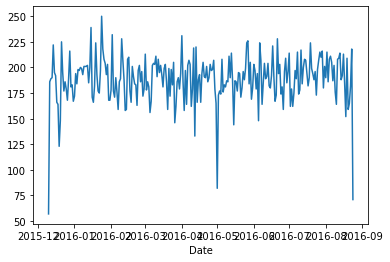

In [34]:
df[df['reason']=='EMS'].groupby('Date').count()['lat'].plot()

In [38]:
day_hour = df.groupby(by=['Day of week','hour']).count()['reason'].unstack()

<AxesSubplot:xlabel='hour', ylabel='Day of week'>

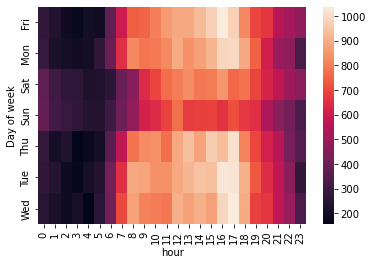

In [39]:
sns.heatmap(day_hour)

In [40]:
day_month = df.groupby(by=['Month','hour']).count()['reason'].unstack()

<AxesSubplot:xlabel='hour', ylabel='Month'>

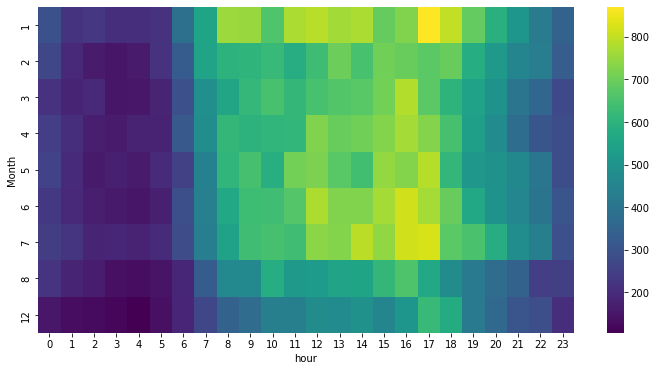

In [43]:
plt.figure(figsize = (12,6))
sns.heatmap(day_month,cmap='viridis')
